<a href="https://colab.research.google.com/github/Joi-e/Data-Manipulation-Coursework/blob/main/section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("rio")
library(rio)
energy_dataset <- import("https://raw.githubusercontent.com/Joi-e/csvFiles/1cda24a5b69c2bc8ddc2a5b9f4f32b1bfa83a5b9/Energy_dataset.csv")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘writexl’, ‘R.utils’




In [ ]:
#Selecting records and aggregate functions
install.packages('sqldf')

library(sqldf)

Heating_load <- "
        SELECT *
        FROM energy_dataset
        WHERE [Heating Load] = (SELECT MIN([Heating Load]) FROM energy_dataset)
        OR [Heating Load] = (SELECT MAX([Heating Load]) FROM energy_dataset)
        "

Heating_load_sql <- sqldf(Heating_load)

print(Heating_load_sql)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



  Relative Compactness Surface Area Wall Area Roof Area Overall Height
1                 0.74          686       245     220.5            3.5
2                 0.79          637       343     147.0            7.0
  Orientation Glazing Area Glazing Area Distribution Heating Load Cooling Load
1           4          0.0                         0         6.01        10.94
2           3          0.4                         2        43.10        39.41


In [ ]:
#Inserting records
values <- c(0.8, 700, 250, 200, 3.7, 3, 0.3, 0.4, 18.2, 24.5)


insert_values <- paste("INSERT INTO energy_dataset VALUES (", paste(values, collapse = ", "), ");", sep = "")


sqldf(insert_values)

Warning message in result_fetch(res@ptr, n = n):
“SQL statements must be issued with dbExecute() or dbSendStatement() instead of dbGetQuery() or dbSendQuery().”


<0 x 0 matrix>

In [ ]:
#Updating records

update_orientation <- "
                      UPDATE energy_dataset SET Orientation == 3
                      WHERE [Heating Load] < 20"

sqldf(update_orientation)

Warning message in result_fetch(res@ptr, n = n):
“SQL statements must be issued with dbExecute() or dbSendStatement() instead of dbGetQuery() or dbSendQuery().”


<0 x 0 matrix>

In [ ]:
#Deleting records

delete_record <- "
DELETE FROM energy_dataset WHERE [Relative Compactness] == 0.9"

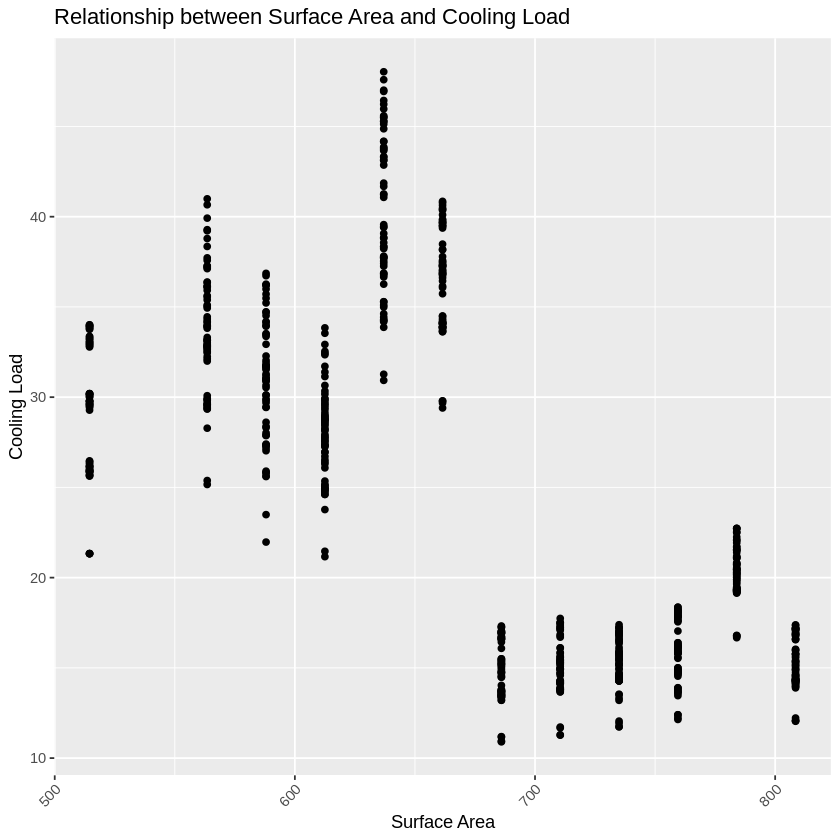

In [ ]:
library(ggplot2)
energy_dataset <- import("https://raw.githubusercontent.com/Joi-e/csvFiles/1cda24a5b69c2bc8ddc2a5b9f4f32b1bfa83a5b9/Energy_dataset.csv")

#Relationship between Surface Area and Cooling Load

energy_plot <- ggplot(energy_dataset, aes(x = `Surface Area`, y = `Cooling Load`)) +
  geom_point() +
  labs(title = "Relationship between Surface Area and Cooling Load",
  x= "Surface Area",
  y = "Cooling Load") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(energy_plot)

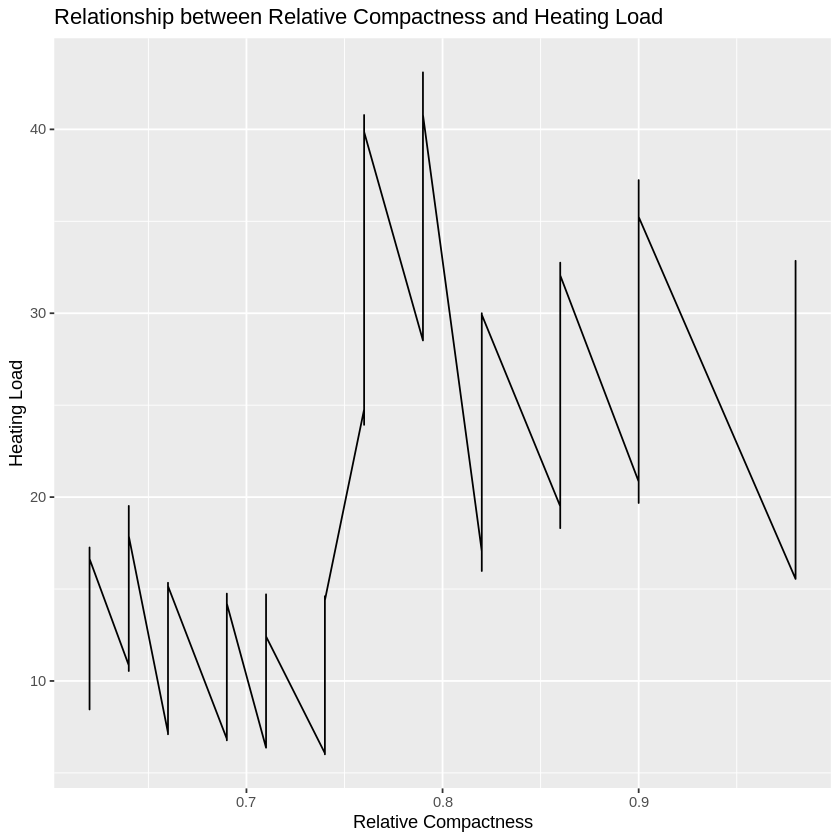

In [ ]:
#Relationship between heating load and relative compactness

energy_line_chart <- ggplot(energy_dataset, aes(x = `Relative Compactness`, y= `Heating Load`)) +
  geom_line() +
  labs(title = "Relationship between Relative Compactness and Heating Load", x = "Relative Compactness", y = "Heating Load")

print(energy_line_chart)

In [ ]:
#Filtering data

filtered_data <- subset(energy_dataset, `Relative Compactness` > 0.9)
print(filtered_data)

    Relative Compactness Surface Area Wall Area Roof Area Overall Height
1                   0.98        514.5       294    110.25              7
2                   0.98        514.5       294    110.25              7
3                   0.98        514.5       294    110.25              7
4                   0.98        514.5       294    110.25              7
49                  0.98        514.5       294    110.25              7
50                  0.98        514.5       294    110.25              7
51                  0.98        514.5       294    110.25              7
52                  0.98        514.5       294    110.25              7
97                  0.98        514.5       294    110.25              7
98                  0.98        514.5       294    110.25              7
99                  0.98        514.5       294    110.25              7
100                 0.98        514.5       294    110.25              7
145                 0.98        514.5       294    

In [ ]:
#Reshaping data

# Load required library
library(tidyr)

# Read the dataset
energy_data <- read.csv("Energy_dataset.csv")

# Reshape the data from wide to long format
long_data <- gather(energy_data, Attribute, Value, -c(Heating_Load, Cooling_Load))

# View the reshaped data
head(long_data)


Warning message in file(file, "rt"):
“cannot open file 'Energy_dataset.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# Aggregating data

library(dplyr)

aggregated_data <- energy_dataset %>%
  group_by(`Glazing Area Distribution`) %>%
  summarize("Average Heating Load" = mean(`Heating Load`))

print(aggregated_data)

# A tibble: 6 × 2
  `Glazing Area Distribution` `Average Heating Load`
                        <int>                  <dbl>
1                           0                   14.3
2                           1                   23.0
3                           2                   22.9
4                           3                   22.7
5                           4                   22.9
6                           5                   22.7


In [ ]:
#Adding new column

energy_dataset$Wall_To_Roof_Ratio <- energy_dataset$`Wall Area` / energy_dataset$`Roof Area`

head(energy_dataset)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Wall_To_Roof_Ratio
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33,2.666667
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33,2.666667
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33,2.666667
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33,2.666667
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28,2.600000
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38,2.600000
